# Coding Practice Session 3
## Relational Plots

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

### Scatter Plots

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


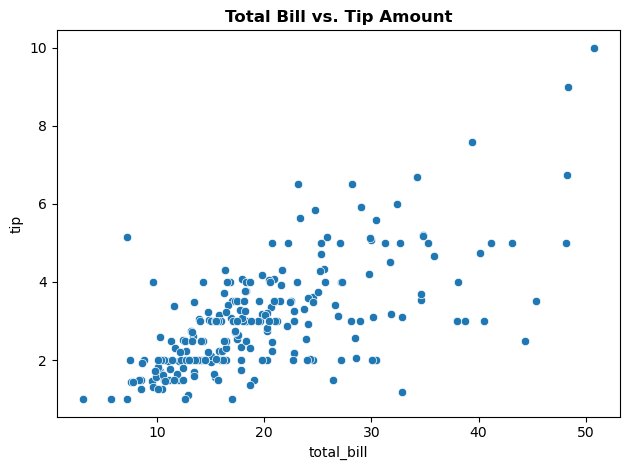

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(data=tips, ax=ax, x="total_bill", y="tip")
ax.set_title("Total Bill vs. Tip Amount", fontweight="bold")

fig.tight_layout()

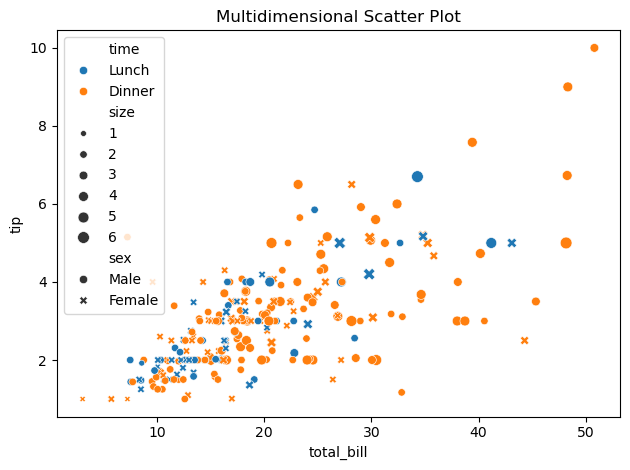

In [ ]:
ax = sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="time", size="size", style="sex"
)
ax.set_title("Multidimensional Scatter Plot")

ax.figure.tight_layout()

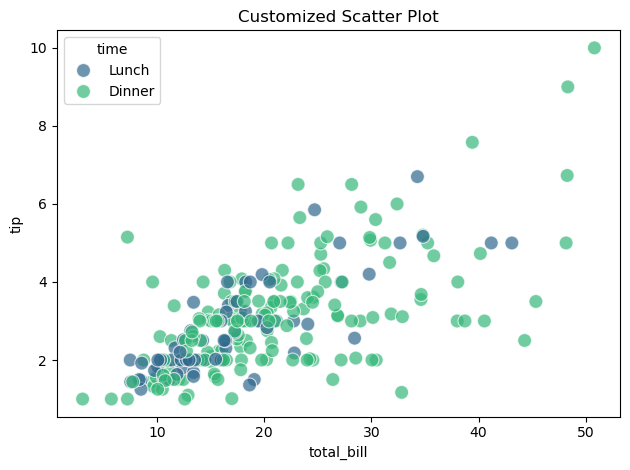

In [ ]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="time", palette="viridis", alpha=0.7, s=100
)
plt.title("Customized Scatter Plot")
plt.tight_layout()

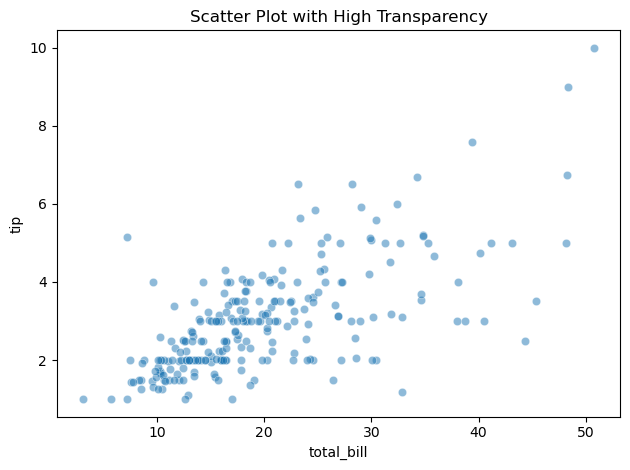

In [26]:
fig, ax = plt.subplots()

sns.scatterplot(data=tips, ax=ax, x="total_bill", y="tip", alpha=0.5)
ax.set_title("Scatter Plot with High Transparency")

fig.tight_layout()

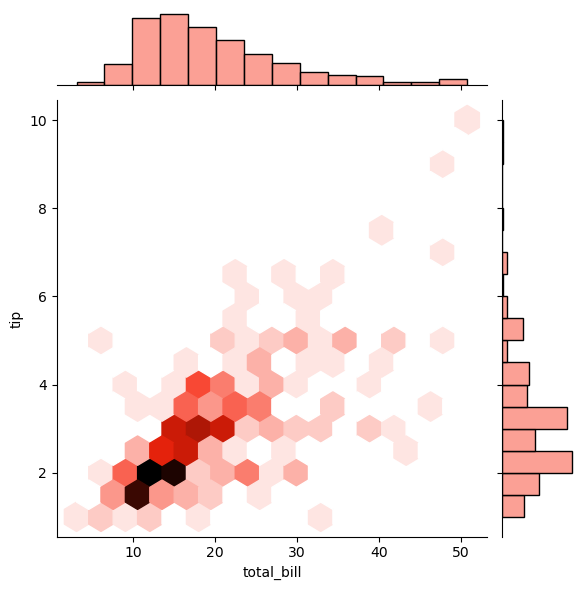

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex", color="salmon")

### Line Plots

In [29]:
fmri = sns.load_dataset("fmri")

In [30]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [31]:
fmri.isna().any()

subject      False
timepoint    False
event        False
region       False
signal       False
dtype: bool

In [32]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


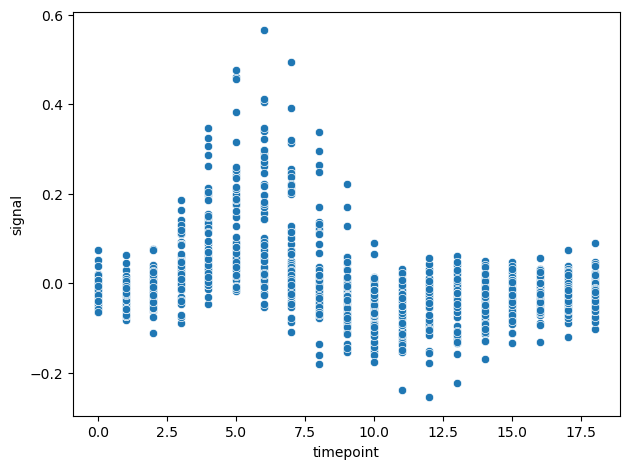

In [69]:
sns.scatterplot(data=fmri, x="timepoint", y="signal")
plt.tight_layout()

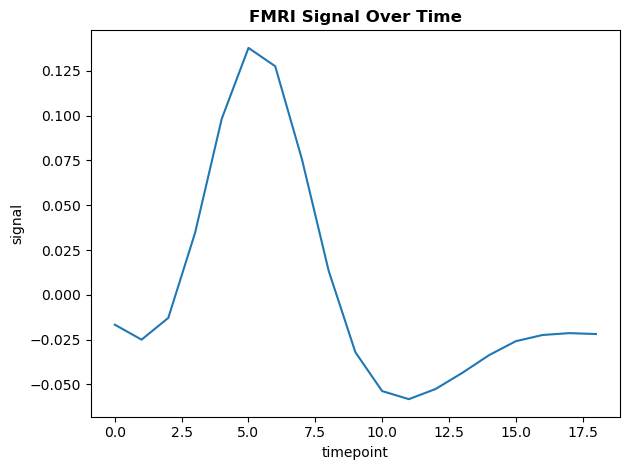

In [40]:
ax = sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar=None)
ax.set_title("FMRI Signal Over Time", fontweight="bold")
plt.tight_layout()

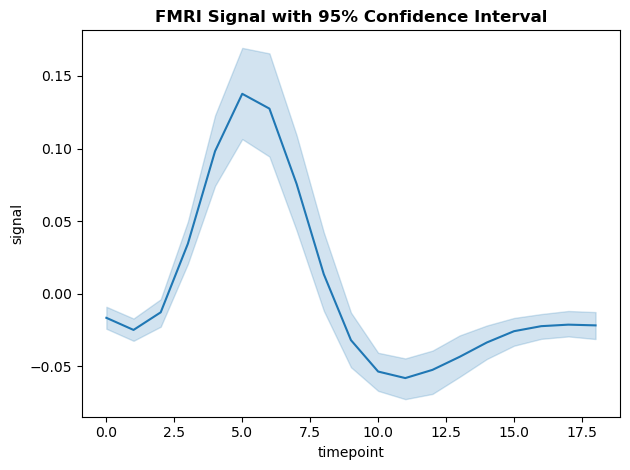

In [43]:
sns.lineplot(data=fmri, x="timepoint", y="signal")
plt.title("FMRI Signal with 95% Confidence Interval", fontweight="bold")
plt.tight_layout()

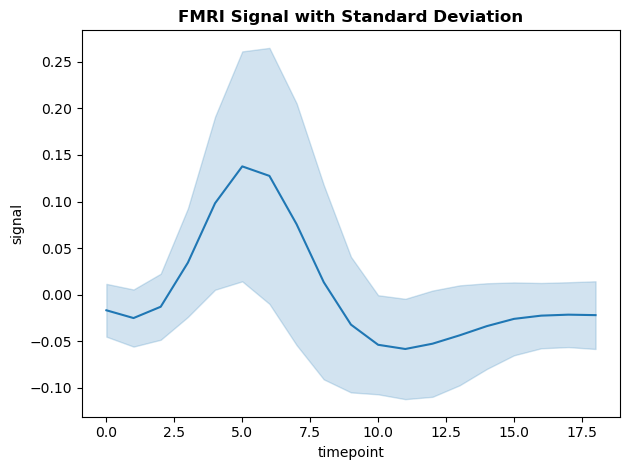

In [44]:
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar="sd")
plt.title("FMRI Signal with Standard Deviation", fontweight="bold")
plt.tight_layout()

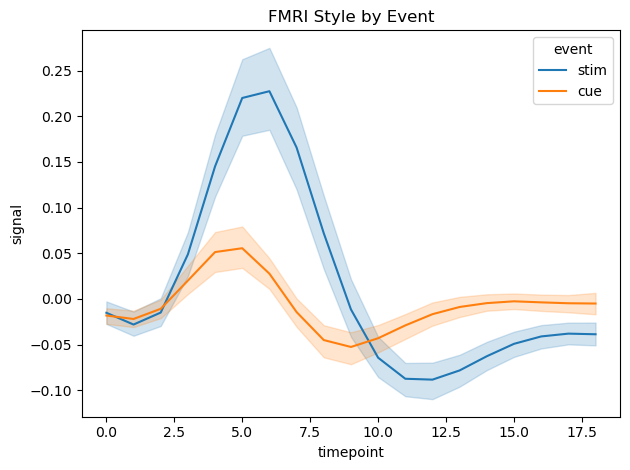

In [53]:
fig, ax = plt.subplots()

sns.lineplot(data=fmri, ax=ax, x="timepoint", y="signal", hue="event", errorbar="ci")
ax.set_title("FMRI Style by Event")

fig.tight_layout()

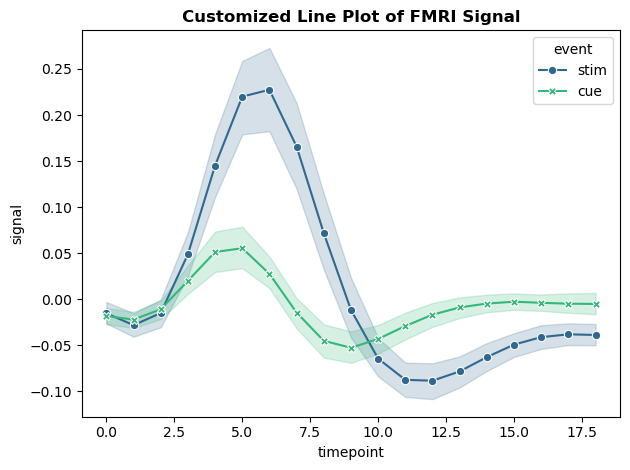

In [67]:
sns.lineplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    style="event",
    markers=True,
    dashes=False,
    palette="viridis"
)

plt.title("Customized Line Plot of FMRI Signal", fontweight="bold")
plt.tight_layout()

### Figure Level Plots

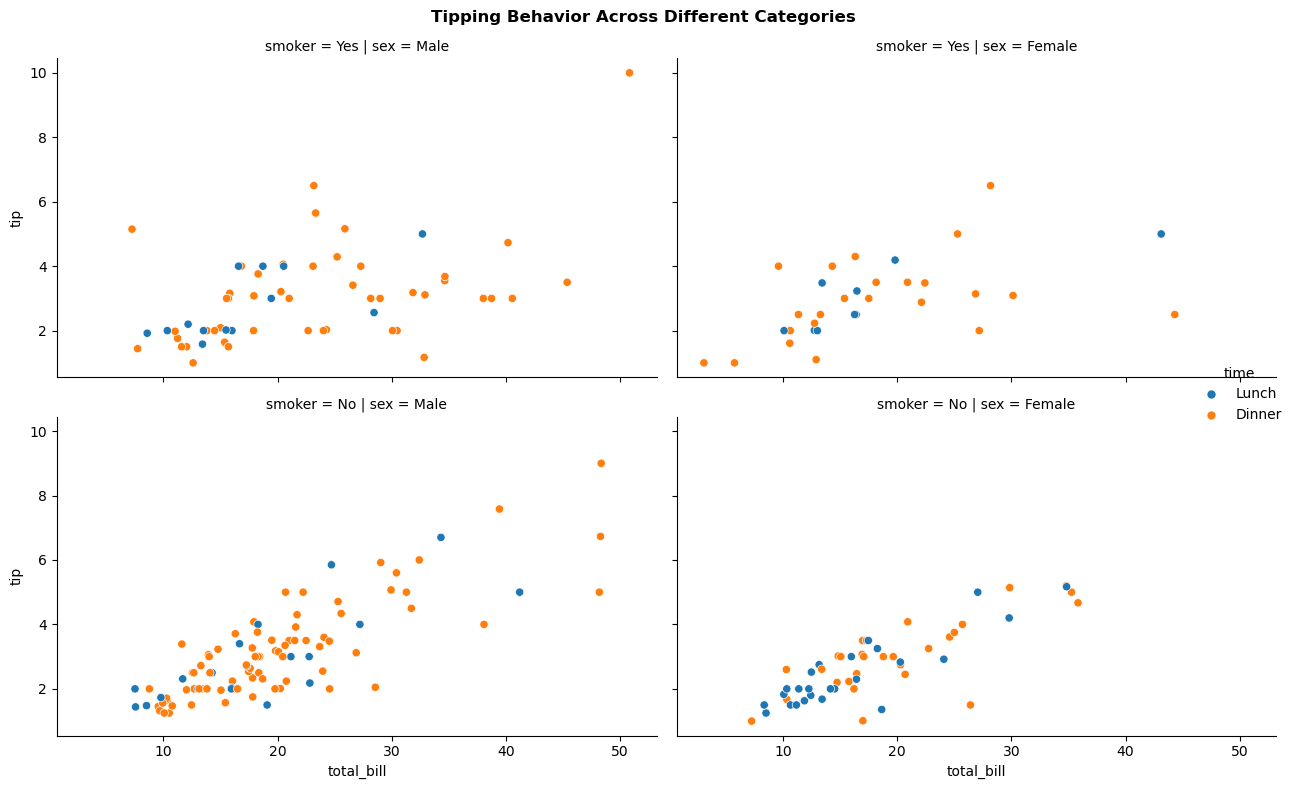

In [90]:
g = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    kind="scatter",
    legend="auto",
    row="smoker",
    col="sex",
    height=4,
    aspect=1.5
)
g.figure.suptitle("Tipping Behavior Across Different Categories", fontweight="bold")

plt.tight_layout()

In [91]:
g.axes

array([[<Axes: title={'center': 'smoker = Yes | sex = Male'}, ylabel='tip'>,
        <Axes: title={'center': 'smoker = Yes | sex = Female'}>],
       [<Axes: title={'center': 'smoker = No | sex = Male'}, xlabel='total_bill', ylabel='tip'>,
        <Axes: title={'center': 'smoker = No | sex = Female'}, xlabel='total_bill'>]],
      dtype=object)

In [92]:
g.axes.ndim

2

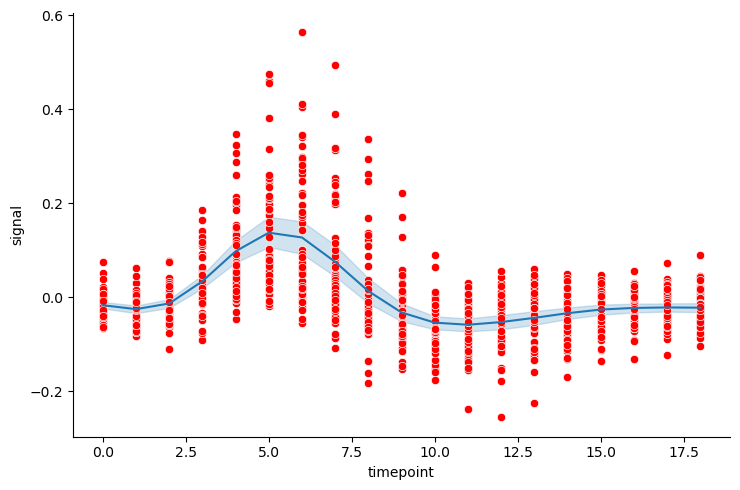

In [99]:
g = sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    kind="line",
    aspect=1.5
)

sns.scatterplot(
    data=fmri, 
    ax=g.axes[0, 0],
    x="timepoint",
    y="signal",
    color="red"
)

g.figure.tight_layout()

In [103]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


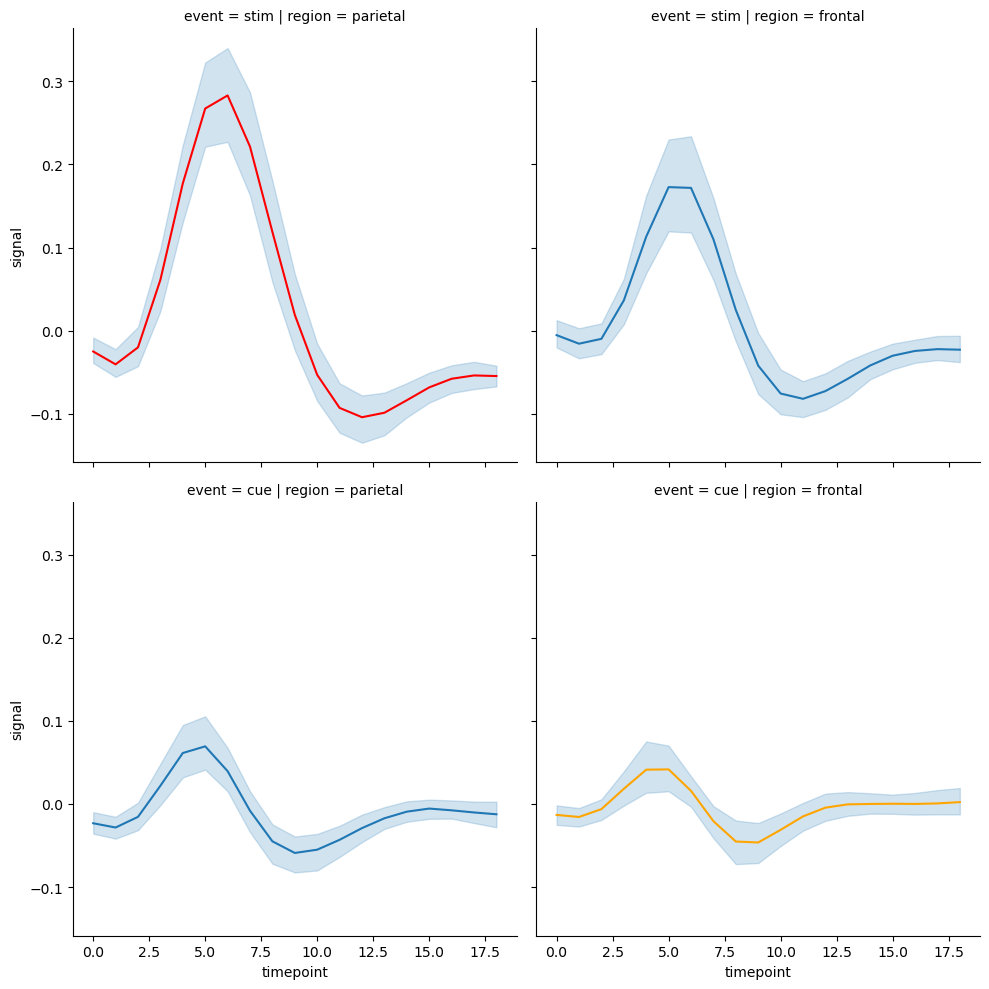

In [109]:
g = sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    row="event",
    col="region",
    aspect=1,
    kind="line"
)

for line in g.axes[0, 0].lines:
    line.set_color("red")

for line in g.axes[1, 1].lines:
    line.set_color("orange")

plt.tight_layout()